In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

%matplotlib inline

In [9]:
## 創建圓資料: 以半徑為5公分，創建一個圓圈資料


x = np.arange(-5, 5, 0.01)
y = (25 - x ** 2)**0.5

x_outlier = np.random.randint(low=-1, high=5, size=(10))
y_outlier = (40 - x_outlier**2)**0.5

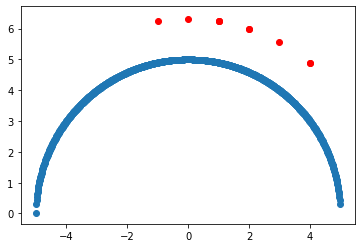

In [11]:
plt.scatter(x, y)
plt.scatter(x_outlier, y_outlier, color='red')

In [17]:
## 合併

X = np.concatenate([x, x_outlier], axis=0).reshape(-1, 1)
Y = np.concatenate([y, y_outlier], axis=0).reshape(-1, 1)
data = np.concatenate([X, Y], axis=1)
df = pd.DataFrame(data, columns=['x', 'y'])

df = df.sample(frac=1)
df.head()

,x,y
754,2.54,4.306785
1005,1.00,6.244998
242,-2.58,4.282943
678,1.78,4.672430
603,1.03,4.892760


In [18]:
## 建模

random_state = 222

iso_forest = IsolationForest(random_state=random_state)
iso_pred = iso_forest.fit_predict(df)
iso_pred

array([ 1, -1,  1, ..., -1, -1, -1])

In [20]:
normal_index

array([1, 0, 1, ..., 0, 0, 0])

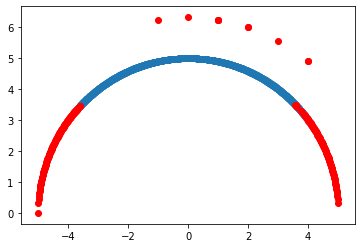

In [21]:
normal_index = (iso_pred == 1)
anomaly_index = (iso_pred != 1)

plt.scatter(df.iloc[normal_index].x, df.iloc[normal_index].y)
plt.scatter(df.iloc[anomaly_index].x, df.iloc[anomaly_index].y, color='red')

> 可以看到很有趣的辨識邊界。